# SENTIMENT ANALYSIS PROJECT
We have to create an API endpoint that accepts a text and returns the associated sentiment with it. The dataset is a set of tweets from people who travelled in airlines. 

The dataset has been uploaded as "airline_sentiment_analysis.csv"

First, we need to check which model is the best fit for our data. We can first explore the data and clean it. Then we can try a few Machine Learning Algorithms and find the best fit!

Models experimented with:
* Logistic Regression
* K-Neighbors Classifier
* SVC
* Decision Tree Classifier
* Random Forest Classifier
* AdaBoost Classifier
* Multinomial Naive Bayes

We didn't experiment with the data being divided according to airline names because the data for each airline is very less so as to get a worthy model.

* Created by: Chandan Satapathy
* Email ID: satapathy.chandan1008@gmail.com

## Step 1: Importing Libraries And Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
airline_data=pd.read_csv('airline_sentiment_analysis.csv',index_col=0) # setting the first column as index
airline_data.index=range(1,11542) # resetting the range to match the size of the data
airline_data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
2,negative,@VirginAmerica it's really aggressive to blast...
3,negative,@VirginAmerica and it's a really big bad thing...
4,negative,@VirginAmerica seriously would pay $30 a fligh...
5,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [15]:
print("No of negative tweets: ",airline_data[airline_data['airline_sentiment']=='negative']['text'].count())
print("No of positive tweets: ",airline_data[airline_data['airline_sentiment']=='positive']['text'].count())
print("Total datapoints: ",airline_data['text'].count())

No of negative tweets:  9178
No of positive tweets:  2363
Total datapoints:  11541


## Step 2: Using pd.get_dummies() to make the sentiment column a numerical

In [4]:
airline_data=pd.get_dummies(airline_data,columns=['airline_sentiment'])
airline_data.head() 
# Now the sentiment is numerical : 0 for negative and 1 for positive in airline_sentiment_positive column

,text,airline_sentiment_negative,airline_sentiment_positive
1,@VirginAmerica plus you've added commercials t...,0,1
2,@VirginAmerica it's really aggressive to blast...,1,0
3,@VirginAmerica and it's a really big bad thing...,1,0
4,@VirginAmerica seriously would pay $30 a fligh...,1,0
5,"@VirginAmerica yes, nearly every time I fly VX...",0,1


In [5]:
airline_data.drop('airline_sentiment_negative',axis=1,inplace=True)
# removing the column that is extra
airline_data.columns=['text','sentiment']
# resetting the column names for simplicity and ease

In [6]:
airline_data.info()
# checking the info of the data : the no of rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11541 entries, 1 to 11541
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       11541 non-null  object
 1   sentiment  11541 non-null  uint8 
dtypes: object(1), uint8(1)
memory usage: 101.6+ KB


In [7]:
airline_data.isna()
# we see that there is no Null value

,text,sentiment
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
...,...,...
11537,False,False
11538,False,False
11539,False,False
11540,False,False


In [8]:
airline_data.isna().count()
# none of the data has any null value

text         11541
sentiment    11541
dtype: int64

## Step 3: marking airlines to every tweet
As every tweet has a tag for an airline, we can check for which airline the tweet is. We can find that by checking every '@' in the tweet.

In [9]:
# checking every tag by checking for '@'
n=[]
def airline_check(text):
    c='@'
    text=text.split(" ")
    for word in text:
        if c in word:
            n.append(word)


In [10]:
# Find the TOP 10 airlines that were tagged
airline_data['text'].apply(airline_check)
m={}
for x in n:
    if x in m:
        m[x]+=1
    else:
        m[x]=1
ll=sorted(m.items(),key=lambda kv:(kv[1],kv[0]))[::-1]
print('Top 10 Airline Tags')
print(ll[:10]) # prints top 10 airline tags

Top 10 Airline Tags
[('@united', 2981), ('@USAirways', 2471), ('@AmericanAir', 2370), ('@SouthwestAir', 1705), ('@JetBlue', 1395), ('@VirginAmerica', 314), ('@United', 97), ('@usairways', 76), ('@', 60), ('@Delta', 46)]


We can see that the airlines in the data are:

1. united =2981
2. usairways =2471
3. americanair =2370
4. southwestair =1705
5. jetblue =1395
6. virginamerica =314

In [11]:
def find_air(text):
    """
    Finds the @ tag and return the airline most probably associated with the tweet.
    """
    c='@'
    d=['united','usairways','americanair','southwestair','jetblue','virginamerica']
    for word in text.split(" "):
        if c in word:
            i=word.index(c)
            if word[i+1:].lower() in d:
                return word[i+1:].lower()
            else:
                for x in d:
                    if x in word.lower():
                        return x

In [12]:
# Makes another column that puts down the airline name next to the tweet
airline_data['airline']=airline_data['text'].apply(find_air)

In [13]:
# How the DataFrame finally looks:
airline_data.head(10)

,text,sentiment,airline
1,@VirginAmerica plus you've added commercials t...,1,virginamerica
2,@VirginAmerica it's really aggressive to blast...,0,virginamerica
3,@VirginAmerica and it's a really big bad thing...,0,virginamerica
4,@VirginAmerica seriously would pay $30 a fligh...,0,virginamerica
5,"@VirginAmerica yes, nearly every time I fly VX...",1,virginamerica
6,"@virginamerica Well, I didn't…but NOW I DO! :-D",1,virginamerica
7,"@VirginAmerica it was amazing, and arrived an ...",1,virginamerica
8,@VirginAmerica I &lt;3 pretty graphics. so muc...,1,virginamerica
9,@VirginAmerica This is such a great deal! Alre...,1,virginamerica
10,@VirginAmerica @virginmedia I'm flying your #f...,1,virginamerica


## Step 4: Graphical Analysis

Text(0.5, 1.0, 'No of Tags in text')

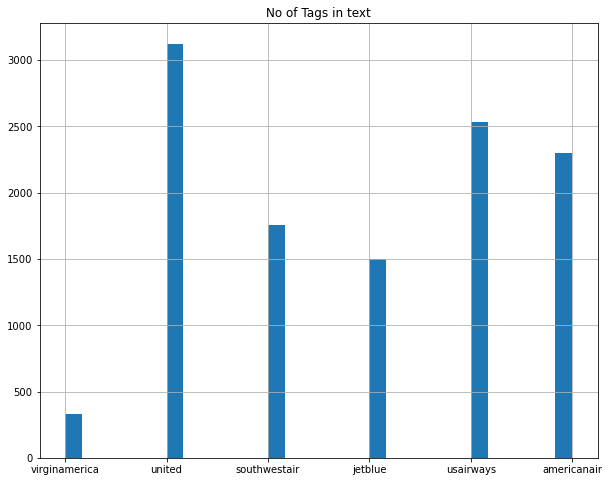

In [14]:
# checking the amount of tweets associated for each airline
airline_data['airline'].hist(bins=30,figsize=(10,8))
plt.title('No of Tags in text')

# We see that United has the most number of tweets associated to it. and the least is for VirginAmerica

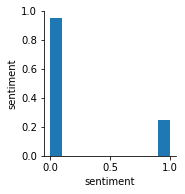

In [15]:
import seaborn as sns
sns.pairplot(airline_data) 
# This graph shows us the number of negative tweets VS the number of positive tweets for the airlines.

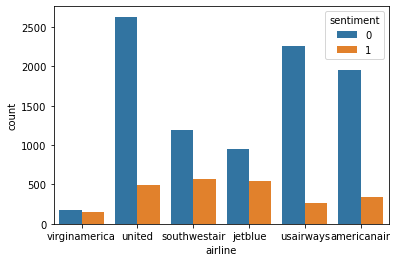

In [17]:
# Check the percentage of positive and negative tweets for every airline 
sns.countplot(x=airline_data['airline'],hue=airline_data['sentiment'])

# We see that United has the worst number of tweets that are negative in sentiment whereas VirginAmerica has the best percentage, but that could also be due to the less data available.

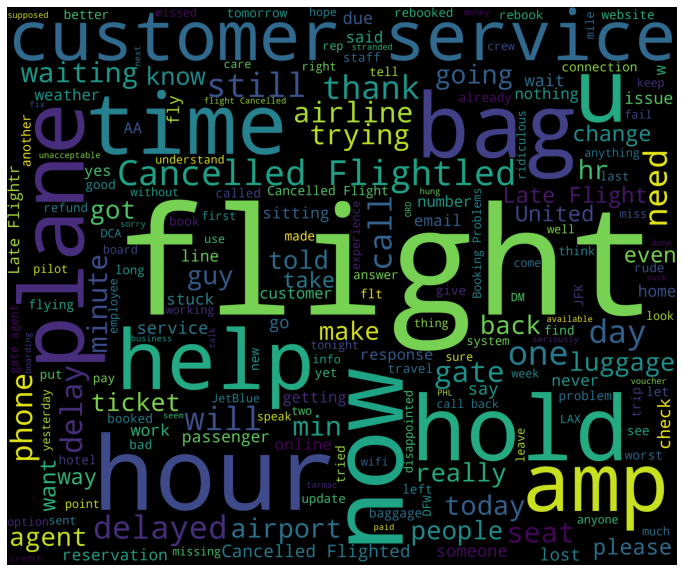

'\nWe see that the major reasons for the negative tweets are:\n1. Plane late/delayed\n2. Hold ups\n3. Cancelled flights\n4. Bad Customer Service\n5. Bad Work by Airport staff\n'

In [18]:
from wordcloud import WordCloud,STOPWORDS
"""
Find the words most associated with all the NEGATIVE sentiments.
"""
new_df=airline_data[airline_data['sentiment']==0]
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

"""
We see that the major reasons for the negative tweets are:
1. Plane late/delayed
2. Hold ups
3. Cancelled flights
4. Bad Customer Service
5. Bad Work by Airport staff
"""

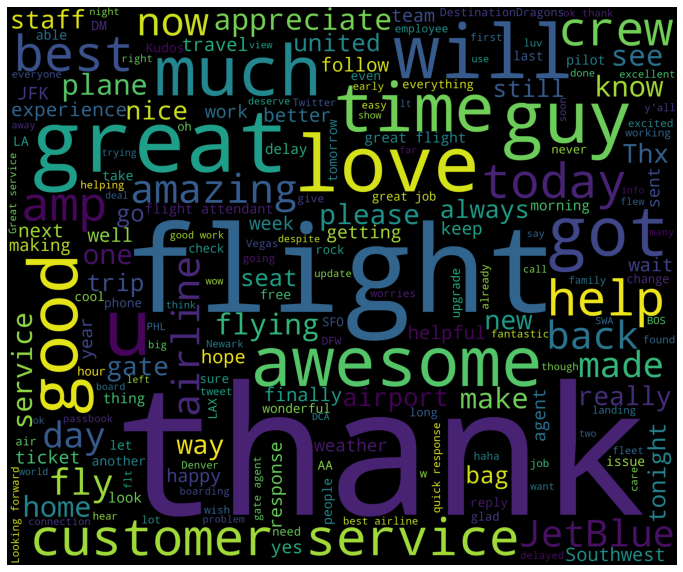

'\nWe see that the major reasons for the positive tweets are:\n1. Good customer service\n2. Nice weather\n3. Nice Airline Crew\n'

In [19]:
"""
Find the words most associated with all the POSITIVE sentiments.
"""
new_df=airline_data[airline_data['sentiment']==1]
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

"""
We see that the major reasons for the positive tweets are:
1. Good customer service
2. Nice weather
3. Nice Airline Crew
"""

## Step 5: Training Machine Learning Models
We are going to train different Machine Learning Models and comparing the F1 scores,the confusion matrices and the Accuracy scores.

In [20]:
# IMPORTING THE MODEL LIBRARIES
import nltk
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
import re


In [21]:
def text_clean(text):
    """
    1.remove punctuation
    2.remove stop words
    3.remove the tags, hashtags,emojis and url links
    4.return list of clean text words
    """
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    text= regrex_pattern.sub(r'',text) #Removing the regex
    ll=text.split(" ")
    c=['@','#','http']
    ll=[ele for ele in ll if all(d not in ele for d in c)]
    m=[c for c in ll if c not in string.punctuation]
    return [word for word in m if word.lower() not in stopwords.words('english')]


In [22]:
# Splitting the data for training and testing

text_train,text_test,sentiment_train,sentiment_test=train_test_split(airline_data['text'],airline_data['sentiment'],test_size=0.3,random_state=42)

In [32]:
# Making a list of Classifiers to perform the comparisons on
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(2),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    MultinomialNB()]

In [33]:
# MAIN FUNCTION THAT COMPARES ALL THE MODELS
# this function takes the models and compares outputs their F1 scores, confusion matrices, classification reports and their accuracy scores.

Accuracy=[] # stores the accuracy scores of eaach model
Model=[] # stores the name of each model


for classifier in Classifiers:
    pipeline=Pipeline([
    ('bow',CountVectorizer(analyzer=text_clean)),
    ('tfidf',TfidfTransformer()),
    ('classifier',classifier)
    ])

    try:
        pipeline.fit(text_train,sentiment_train)
        pred=pipeline.predict(text_test)
    except:
        # when the series is sparse and needs to be made dense
        dense_features=text_train.to_dense()
        dense_test=text_test.to_dense()
        pipeline.fit(dense_features,sentiment_train)
        pred=pipeline.predict(dense_test)

    print('ABOUT MODEL : ',classifier.__class__.__name__)
    print('f1 score',f1_score(sentiment_test,pred))
    print('confusion matrix',confusion_matrix(sentiment_test,pred))
    print('classification report',classification_report(sentiment_test,pred))
    print("\n")
    Accuracy.append(accuracy_score(sentiment_test,pred))
    Model.append(classifier.__class__.__name__)

ABOUT MODEL :  LogisticRegression
f1 score 0.0
confusion matrix [[2771    0]
 [ 692    0]]
classification report               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2771
           1       0.00      0.00      0.00       692

    accuracy                           0.80      3463
   macro avg       0.40      0.50      0.44      3463
weighted avg       0.64      0.80      0.71      3463



ABOUT MODEL :  KNeighborsClassifier
f1 score 0.2581453634085213
confusion matrix [[2768    3]
 [ 589  103]]
classification report               precision    recall  f1-score   support

           0       0.82      1.00      0.90      2771
           1       0.97      0.15      0.26       692

    accuracy                           0.83      3463
   macro avg       0.90      0.57      0.58      3463
weighted avg       0.85      0.83      0.77      3463



ABOUT MODEL :  SVC
f1 score 0.6519337016574586
confusion matrix [[2731   40]
 [ 338  354]]
classifi

In [34]:
# prints the accuracy achieved for each model
for i in range(len(Model)):
    print('Accuracy of ',Model[i],'is ' ,Accuracy[i]) 

Accuracy of  LogisticRegression is  0.8001732601790356
Accuracy of  KNeighborsClassifier is  0.8290499566849553
Accuracy of  SVC is  0.8908460872076235
Accuracy of  DecisionTreeClassifier is  0.8489748772740399
Accuracy of  RandomForestClassifier is  0.8902685532775051
Accuracy of  AdaBoostClassifier is  0.8691885648281836
Accuracy of  MultinomialNB is  0.8414669361825007


Text(0.5, 1.0, 'Accuracies of Models')

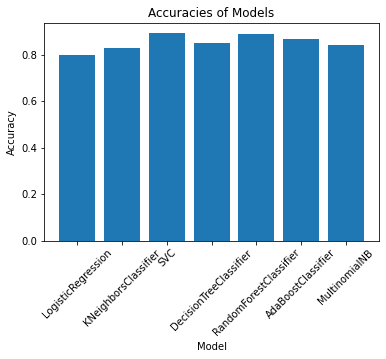

In [35]:
# plots the bar graph that compares the accuracy of each model
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

# CONCLUSION:
We see that of all the different models used in the pipeline, The RandomForestClassifier is the best of all with :

1. A f1 score= 0.6828046744574291
2. The accuracy score being = 0.8902685532775051

The SVC classifer had a better accuracy score but it had a less f1 score and thus the final model we will be using would be the RandomForestClassifier().